In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
goodsSale = pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',encoding='utf8',low_memory=False)
submit = pd.read_csv('C:/Users/xyttttt/Desktop/submit_example.csv',encoding='utf8',low_memory=False)

goodsNum = pd.DataFrame({'sku_id':submit['sku_id']})
goodsNum12 = pd.DataFrame({'sku_id':submit['sku_id']})
dates = []
for i in range(20180203,20180229):
    dates.append(i)
for i in range(20180301,20180317):
    dates.append(i)
for date in dates:
    sale12 = goodsSale[(goodsSale.data_date==date)]
    df = pd.DataFrame({str(date):sale12.goods_num,'sku_id':sale12.sku_id})
    goodsNum12 = pd.merge(goodsNum12,df,on='sku_id',how='left')
plandate = []
for date in range(20180203,20180210):
    plandate.append(str(date))
goodsNum12['plan4'] = pd.DataFrame(goodsNum12,columns=plandate).apply(lambda x:x.sum()/7,axis=1)
plandate = []
for date in range(20180210,20180217):
    plandate.append(str(date))
goodsNum12['plan5'] = pd.DataFrame(goodsNum12,columns=plandate).apply(lambda x:x.sum(),axis=1)
plandate = []
for date in range(20180217,20180224):
    plandate.append(str(date))
goodsNum12['plan6'] = pd.DataFrame(goodsNum12,columns=plandate).apply(lambda x:x.sum(),axis=1)
plandate = []
for date in range(20180224,20180229):
    plandate.append(str(date))
for date in range(20180301,20180303):
    plandate.append(str(date))
goodsNum12['plan7'] = pd.DataFrame(goodsNum12,columns=plandate).apply(lambda x:x.sum(),axis=1)
plandate = []
for date in range(20180303,20180310):
    plandate.append(str(date))
goodsNum12['plan8'] = pd.DataFrame(goodsNum12,columns=plandate).apply(lambda x:x.sum(),axis=1)
plandate = []
for date in range(20180310,20180317):
    plandate.append(str(date))
goodsNum12['plan9'] = pd.DataFrame(goodsNum12,columns=plandate).apply(lambda x:x.sum(),axis=1)

fileHead = 'C:/Users/xyttttt/Desktop'
goodsPromotePrice = pd.read_csv(fileHead+'/goods_promote_price.csv',encoding='utf8')
goodsSkuRelation = pd.read_csv(fileHead+'/goods_sku_relation.csv',encoding='utf8')
goodsDaily = pd.read_csv(fileHead+'/goodsdaily.csv',encoding='utf8')
goodsInfo = pd.read_csv(fileHead+'/goodsinfo.csv',encoding='utf8')
marketing = pd.read_csv(fileHead+'/marketing.csv',encoding='utf8')
allDataDate=[]
days = [31,28,31,30,31,30,31,31,30,31,30,31]
for y in [2017,2018]:
    for m in range(1,13):
        for d in range(1,days[m-1]+1):
            allDataDate.append(int(str(y)+('0'+str(m))[-2:]+('0'+str(d))[-2:]))
allDataDate = allDataDate[59:440]
allDate = {}
for date in allDataDate:
    allDate[date] = allDataDate.index(date)
allDate = pd.DataFrame({'data_date':list(allDate.keys()),'day_num':list(allDate.values())})
allDate['data_date'] = allDate['data_date'].astype('int')
allDate['day_num'] = allDate['day_num'].astype('int')

goodsDate = pd.DataFrame({'data_date':goodsDaily.data_date,'goods_id':goodsDaily.goods_id,'onsale_days':goodsDaily.onsale_days})
goodsDate = goodsDate.drop_duplicates('goods_id')
goodsDate = pd.merge(goodsDate, allDate, on='data_date',how='left')
goodsDate['market_day'] = goodsDate.day_num-goodsDate.onsale_days
goodsDate.loc[goodsDate.market_day<0,'market_day'] = 0
goodsDate = pd.merge(goodsDate, pd.DataFrame({'market_day':allDate.day_num,'market_date':allDate.data_date}),on='market_day',how='left')
goodsDate = pd.merge(goodsDate, goodsSkuRelation, on='goods_id',how='left')
goodsDate = goodsDate.drop(['data_date','day_num','market_day'],axis=1)

ddddffff = pd.merge(submit, goodsDate, on='sku_id',how='left')

print(1)

1


In [3]:
row=0
sku=[]
whole=[]
r,c=submit.shape
for i in tqdm(range(r)):
    skuid=submit.iloc[i,0]
    good=ddddffff.loc[ddddffff['sku_id']==skuid]
    whole.append(skuid)
    if good.market_date.item() <= 20180210:
        sku.append(skuid)   
#有100846个sku
ret = list(set(sku) ^ set(whole))
ret

100%|██████████| 104510/104510 [11:47<00:00, 146.09it/s]


['SKWSiV79',
 'SKaedYoE',
 'SKlL8s4b',
 'SK4FSMuv',
 'SKJmBOtA',
 'SKeotRyw',
 'SKWZ4Czu',
 'SKN2mg6i',
 'SKGV7jvH',
 'SKigPKMY',
 'SK450k1b',
 'SKtGoNkD',
 'SKZ6mRUs',
 'SKp0NgzI',
 'SK0QdUne',
 'SKcVlfDi',
 'SK0P9Ovw',
 'SKMsv6Pt',
 'SKKarN6q',
 'SKDTYz8I',
 'SKM3A5x9',
 'SK8k9A0z',
 'SKI9zNYX',
 'SKMuyiD0',
 'SKzfsZVI',
 'SKZl1qWo',
 'SKElO1Xp',
 'SKCpfF90',
 'SKPFih5Q',
 'SKXhsP8j',
 'SKcwL53W',
 'SKRocNb8',
 'SK0YLFJu',
 'SKDlcmW9',
 'SKutdonl',
 'SKr2xvLT',
 'SK8TnV6D',
 'SKBagEqf',
 'SKj4SAsz',
 'SKCsdMNo',
 'SKQ8XlBG',
 'SKV9tZAX',
 'SKGUl3Np',
 'SKKHcO2s',
 'SKa3IZ2x',
 'SKibyRVN',
 'SKNrnOmI',
 'SKl1LemO',
 'SKFJvIUR',
 'SKIXRlA4',
 'SKCpfg75',
 'SKgpNKq0',
 'SKln38MD',
 'SKxGAsV2',
 'SK2ILGKJ',
 'SKhDJ8r0',
 'SKNCbum0',
 'SKKY9USi',
 'SK2ne063',
 'SKU74uEl',
 'SKN8ZgfW',
 'SK0Bv8b6',
 'SKsXdMyr',
 'SK5bdRpI',
 'SKDchtHr',
 'SKL5a8cz',
 'SKKXUziB',
 'SKxtikzY',
 'SKWwKruB',
 'SK4JWD7A',
 'SK9jXBDQ',
 'SKqQGzxN',
 'SK0uRqp5',
 'SKr40cJ2',
 'SKXGTRUE',
 'SKVm2LX5',
 'SKfagi6G',

In [7]:
from tqdm import tqdm
feb=20180210
mar=20180300
cnt=0
df2 = pd.DataFrame({'sku_id':sku})
dates = []
for i in range(20180203,20180229):
    dates.append(i)
for i in range(20180301,20180317):
    dates.append(i)
for date in dates:
    sale12 = goodsSale[(goodsSale.data_date==date)]
    df1 = pd.DataFrame({str(date):sale12.goods_num,'sku_id':sale12.sku_id})
    df2 = pd.merge(df2,df1,on='sku_id',how='left')
df2

,sku_id,20180203,20180204,20180205,20180206,20180207,20180208,20180209,20180210,20180211,...,20180307,20180308,20180309,20180310,20180311,20180312,20180313,20180314,20180315,20180316
0,SKDtK67I,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SKpLKkIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SK2vQMpX,NaN,4.0,3.0,NaN,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,2.0,1.0,2.0,4.0,1.0,NaN,2.0,1.0
3,SKY0RuBE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN
4,SKvr2o3y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SK4VKk3b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
6,SKDbZjmX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
7,SK9wkGUJ,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,SKjQriLy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SKGy1eQD,NaN,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN


In [8]:
cnt=0
for i in range(1000):
    jd=0
    pdate=[]
    if feb+i>=20180312:
        break
    if feb+i>=20180229:
        if feb+i<=20180300:
            continue
    start=feb+i
    cnt+=1
    end=start+7
    if start <= 20180228:
        if 20180228-start + 1 < 7:
            jd=1
            end=mar+7-20180228+start-1
    if jd==1:
        for k in range(20180228-start+1):
            pdate.append(str(k+start))
        for k in range(end-mar):
            pdate.append(str(mar+k+1))
        df2[str(cnt)]=pd.DataFrame(df2,columns=pdate).apply(lambda x:x.sum(),axis=1)
    else:
        if start<20180230:
            for k in range(7):
                pdate.append(str(k+start))
        elif start>20180300:
            for k in range(7):
                pdate.append(str(k+start))
        df2[str(cnt)]=pd.DataFrame(df2,columns=pdate).apply(lambda x:x.sum(),axis=1)
    print(pdate)

['20180210', '20180211', '20180212', '20180213', '20180214', '20180215', '20180216']
['20180211', '20180212', '20180213', '20180214', '20180215', '20180216', '20180217']
['20180212', '20180213', '20180214', '20180215', '20180216', '20180217', '20180218']
['20180213', '20180214', '20180215', '20180216', '20180217', '20180218', '20180219']
['20180214', '20180215', '20180216', '20180217', '20180218', '20180219', '20180220']
['20180215', '20180216', '20180217', '20180218', '20180219', '20180220', '20180221']
['20180216', '20180217', '20180218', '20180219', '20180220', '20180221', '20180222']
['20180217', '20180218', '20180219', '20180220', '20180221', '20180222', '20180223']
['20180218', '20180219', '20180220', '20180221', '20180222', '20180223', '20180224']
['20180219', '20180220', '20180221', '20180222', '20180223', '20180224', '20180225']
['20180220', '20180221', '20180222', '20180223', '20180224', '20180225', '20180226']
['20180221', '20180222', '20180223', '20180224', '20180225', '201

In [11]:
import numpy as np
means=[]
for i in range(30):
    p=i+1
    means.append(str(p))
df2['mean']=pd.DataFrame(df2,columns=means).apply(lambda x:x.sum()/30,axis=1)
df2

,sku_id,20180203,20180204,20180205,20180206,20180207,20180208,20180209,20180210,20180211,...,22,23,24,25,26,27,28,29,30,mean
0,SKDtK67I,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,1.433333
1,SKpLKkIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700000
2,SK2vQMpX,NaN,4.0,3.0,NaN,2.0,2.0,1.0,2.0,2.0,...,6.0,5.0,6.0,9.0,10.0,10.0,12.0,11.0,10.0,8.700000
3,SKY0RuBE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,2.0,2.0,2.0,3.0,3.0,4.0,4.0,3.0,1.366667
4,SKvr2o3y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466667
5,SK4VKk3b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.333333
6,SKDbZjmX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,1.0,1.433333
7,SK9wkGUJ,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.066667
8,SKjQriLy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.700000
9,SKGy1eQD,NaN,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,0.700000


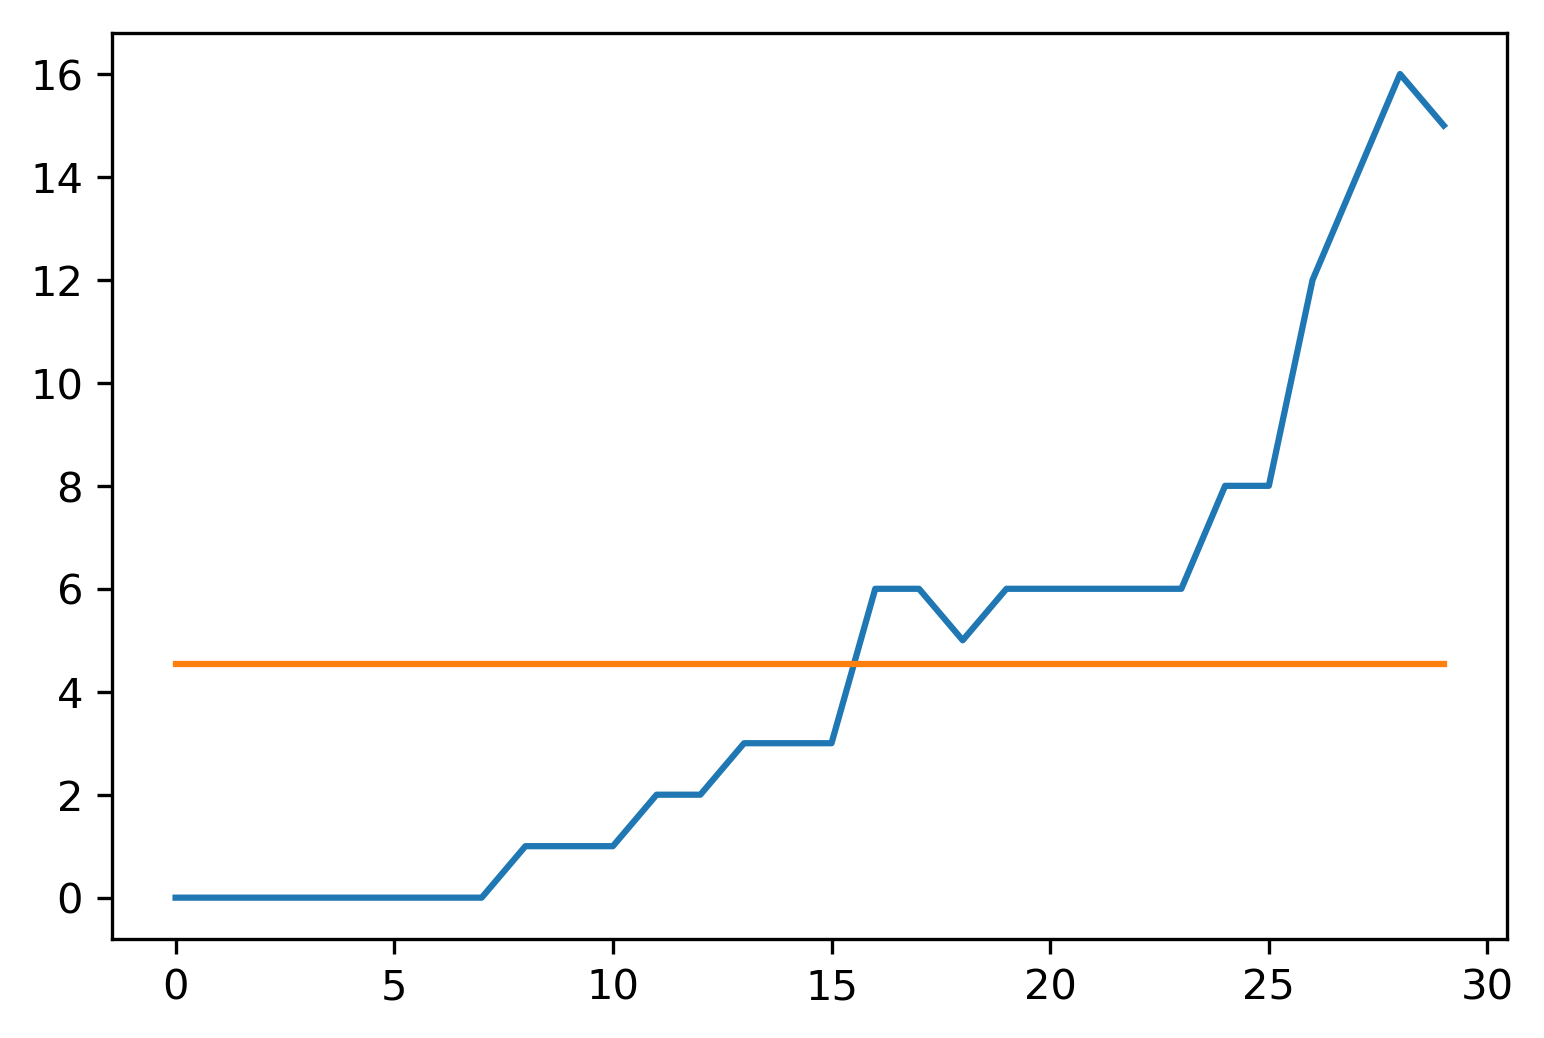

In [28]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
df3=df2.loc[df2['sku_id']=='SK8Jagpd']
numm=[]
mm=[]
for i in range(30):
    p=i+1
    numm.append(df3[str(p)].item())
    mm.append(df3['mean'].item())
plt.rcParams['figure.dpi'] = 300
plt.plot(numm)
plt.plot(mm)

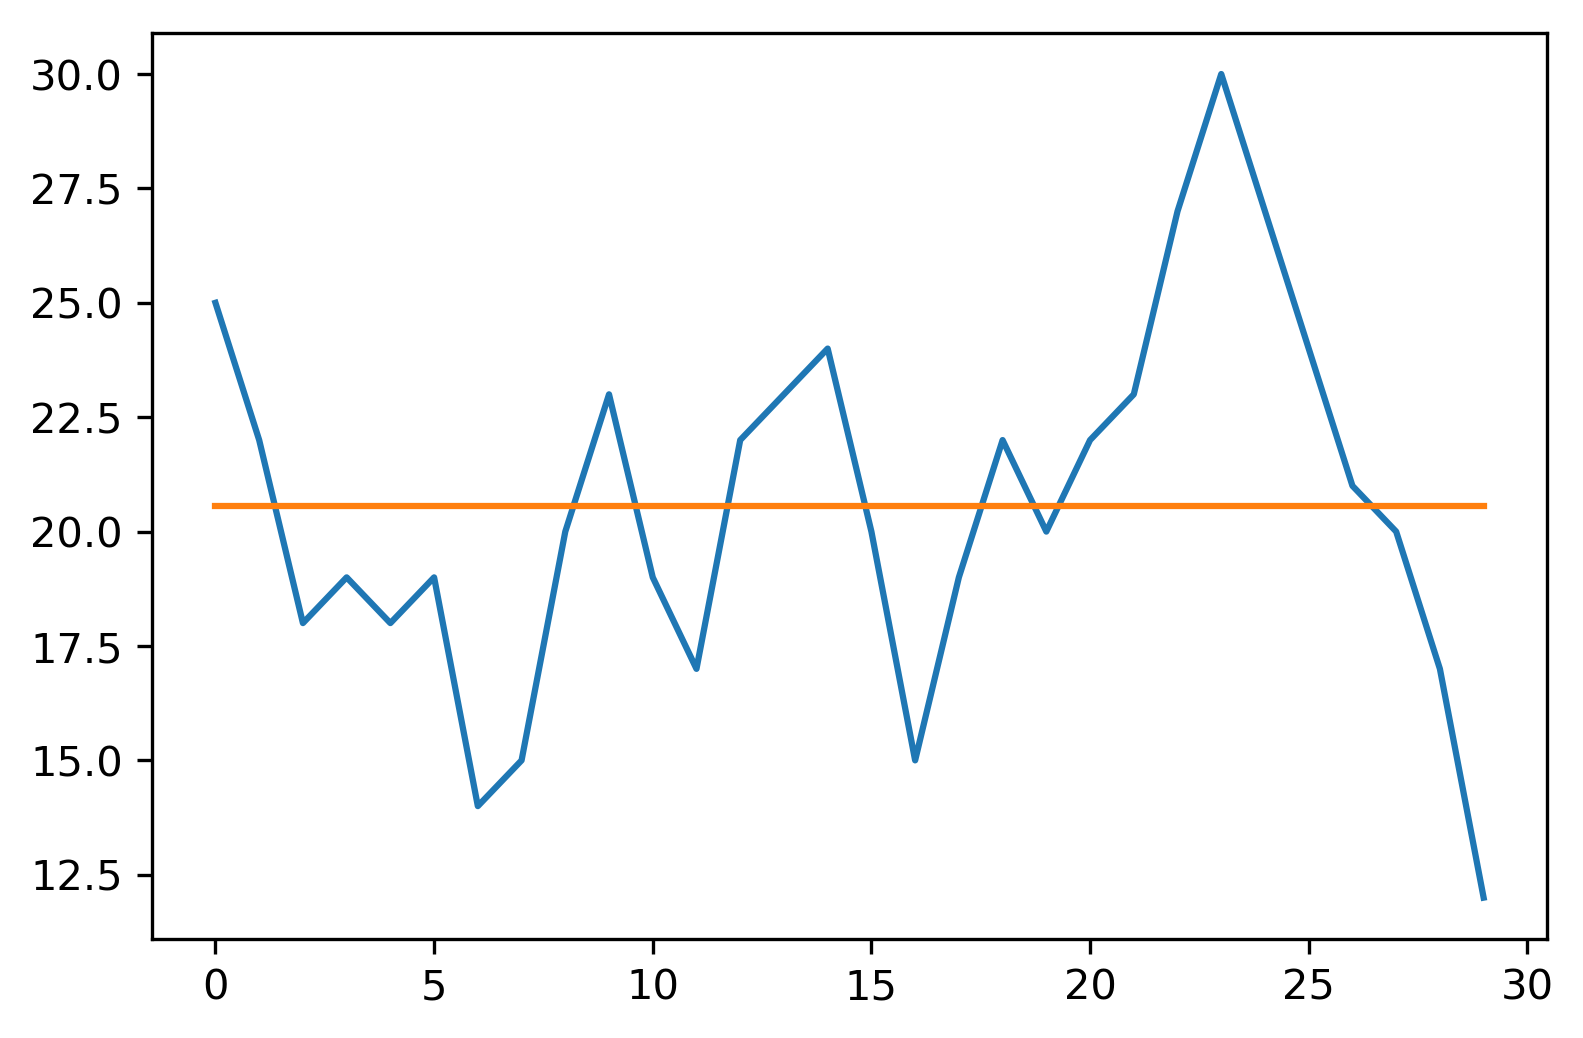

In [29]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
df3=df2.loc[df2['sku_id']=='SKcV6Nna']
numm=[]
mm=[]
for i in range(30):
    p=i+1
    numm.append(df3[str(p)].item())
    mm.append(df3['mean'].item())
plt.rcParams['figure.dpi'] = 300
plt.plot(numm)
plt.plot(mm)

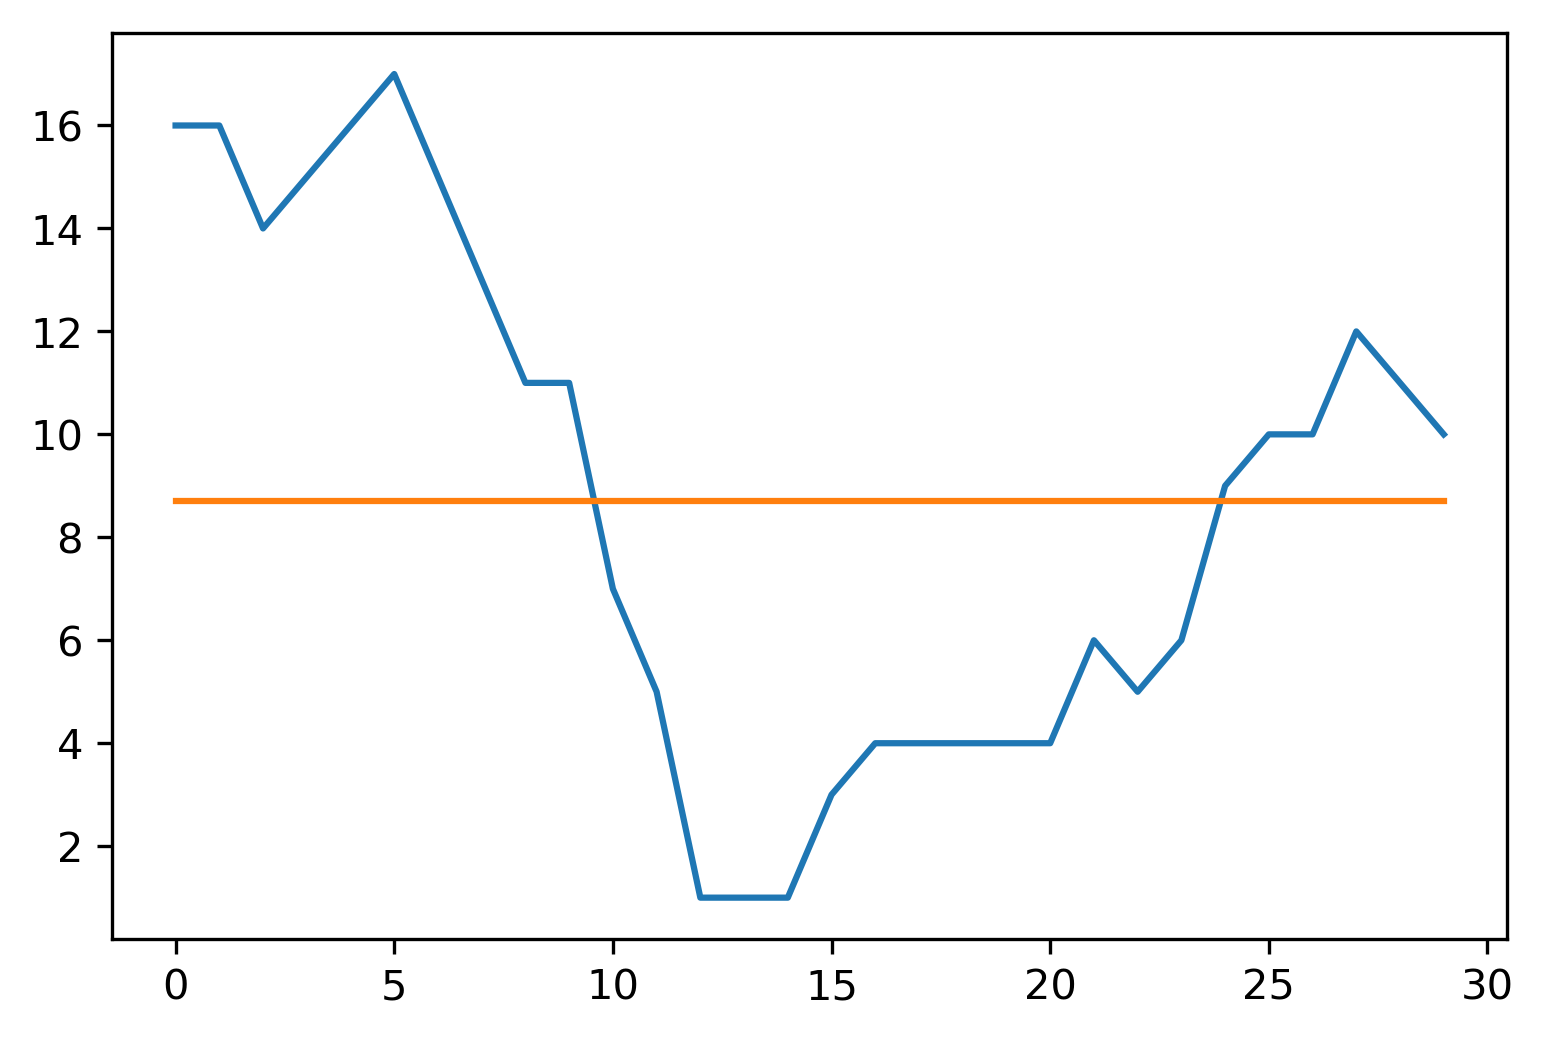

In [35]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
df3=df2.loc[df2['sku_id']=='SK2vQMpX']
numm=[]
mm=[]
for i in range(30):
    p=i+1
    numm.append(df3[str(p)].item())
    mm.append(df3['mean'].item())
plt.rcParams['figure.dpi'] = 300
plt.plot(numm)
plt.plot(mm)

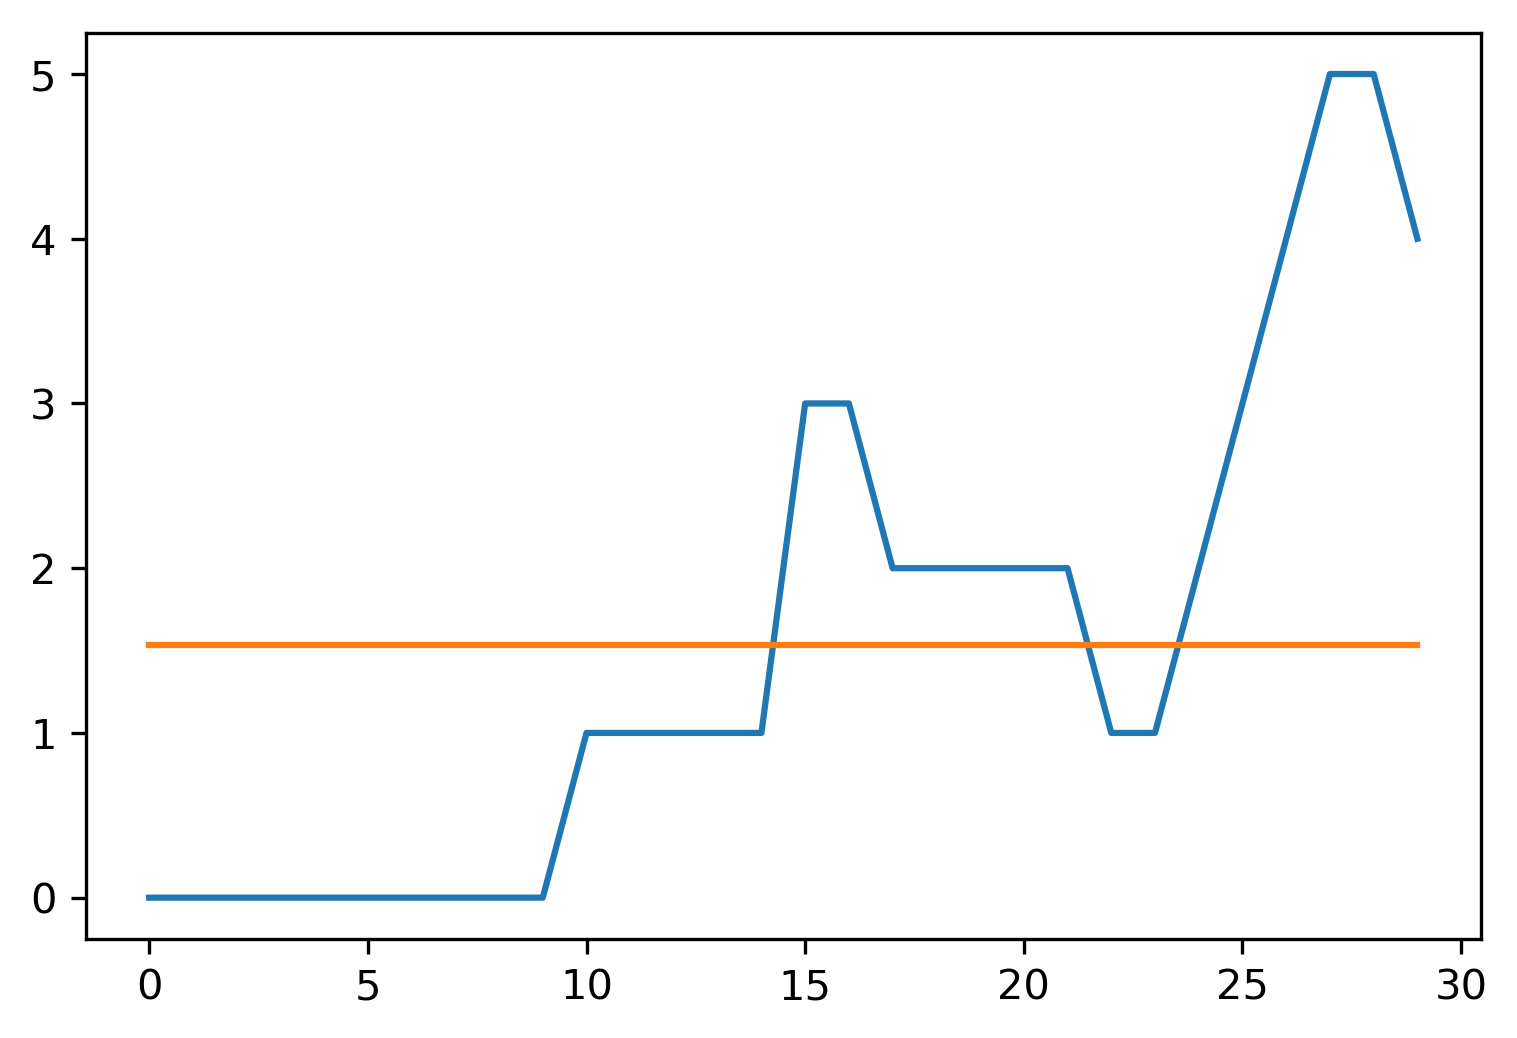

In [36]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
df3=df2.loc[df2['sku_id']=='SKiKBu9I']
numm=[]
mm=[]
for i in range(30):
    p=i+1
    numm.append(df3[str(p)].item())
    mm.append(df3['mean'].item())
plt.rcParams['figure.dpi'] = 300
plt.plot(numm)
plt.plot(mm)
